### Importing Modules

In [48]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model, metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


### Loading the dataset

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv('/content/test.csv')

In [3]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [4]:
train.dtypes

Product_id           object
Stall_no            float64
instock_date         object
Market_Category       int64
Customer_name        object
Loyalty_customer     object
Product_Category     object
Grade                 int64
Demand                int64
Discount_avail      float64
charges_1           float64
charges_2 (%)       float64
Minimum_price       float64
Maximum_price       float64
Selling_Price       float64
dtype: object

#### New Features using datetime from 'instock_date'

In [5]:
# For train data
train['instock_date']= pd.to_datetime(train['instock_date'])
train['year'] = train['instock_date'].dt.year
train['month'] =  train['instock_date'].dt.month
train['quarter'] = train['instock_date'].dt.quarter
train['day of the week'] = train['instock_date'].dt.dayofweek # Monday = 0 & Sunday = 6
train['Dayofyear'] = train['instock_date'].dt.dayofyear
train["hour"] = train['instock_date'].dt.hour


In [6]:
# For test data
test['instock_date']= pd.to_datetime(test['instock_date'])
test['year'] = test['instock_date'].dt.year
test['month'] =  test['instock_date'].dt.month
test['quarter'] = test['instock_date'].dt.quarter
test['day of the week'] = test['instock_date'].dt.dayofweek # Monday = 0 & Sunday = 6
test['Dayofyear'] = test['instock_date'].dt.dayofyear
test["hour"] = test['instock_date'].dt.hour

In [7]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,year,month,quarter,day of the week,Dayofyear,hour
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8,3,5,234,18
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3,1,6,87,21
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8,3,1,230,19
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3,1,0,88,21
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3,1,1,89,22


In [8]:
train.shape

(6368, 21)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product_id        6368 non-null   object        
 1   Stall_no          6363 non-null   float64       
 2   instock_date      6368 non-null   datetime64[ns]
 3   Market_Category   6368 non-null   int64         
 4   Customer_name     6157 non-null   object        
 5   Loyalty_customer  6368 non-null   object        
 6   Product_Category  6368 non-null   object        
 7   Grade             6368 non-null   int64         
 8   Demand            6368 non-null   int64         
 9   Discount_avail    6330 non-null   float64       
 10  charges_1         6170 non-null   float64       
 11  charges_2 (%)     6163 non-null   float64       
 12  Minimum_price     6330 non-null   float64       
 13  Maximum_price     6025 non-null   float64       
 14  Selling_Price     6327 n

In [11]:
# Finding number of unique values in each columns
for col in train.columns:
  print(col,train[col].nunique())

Product_id 6368
Stall_no 50
instock_date 5350
Market_Category 248
Customer_name 5900
Loyalty_customer 2
Product_Category 10
Grade 4
Demand 100
Discount_avail 2
charges_1 487
charges_2 (%) 17
Minimum_price 4236
Maximum_price 4618
Selling_Price 6321
year 3
month 11
quarter 4
day of the week 7
Dayofyear 214
hour 24


In [12]:
# Finding number of null values in each column
train.isnull().sum()


Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
year                  0
month                 0
quarter               0
day of the week       0
Dayofyear             0
hour                  0
dtype: int64

In [13]:
# Excluding rows where train['Selling_Price'] is null
train = train[train['Selling_Price'].notna()]


In [14]:
# Replacing null values in train['Customer_name'] with mode
train['Customer_name'] = train['Customer_name'].fillna(train['Customer_name'].mode()[0])



In [15]:
# After applying Label Encoding to categorical columns: train['Customer_name'], train['Loyalty_customer'], train['Product_Category']

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Customer_name'. 
train['Customer_name']= label_encoder.fit_transform(train['Customer_name']) 

# Encode labels in column 'Loyalty_customer'. 
train['Loyalty_customer']= label_encoder.fit_transform(train['Loyalty_customer']) 

# Encode labels in column 'Product_Category'. 
train['Product_Category']= label_encoder.fit_transform(train['Product_Category']) 





In [16]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,year,month,quarter,day of the week,Dayofyear,hour
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,3706,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8,3,5,234,18
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,3427,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3,1,6,87,21
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,4790,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8,3,1,230,19
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,67,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3,1,0,88,21
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,1740,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3,1,1,89,22


In [17]:
train.Stall_no.describe()

count    6322.000000
mean       25.312243
std        14.331376
min         1.000000
25%        13.000000
50%        25.000000
75%        37.000000
max        50.000000
Name: Stall_no, dtype: float64

In [18]:
# Converting the negative values in "Selling_Price" to its absolute value (positive value)
train['Selling_Price'] = train['Selling_Price'].abs()


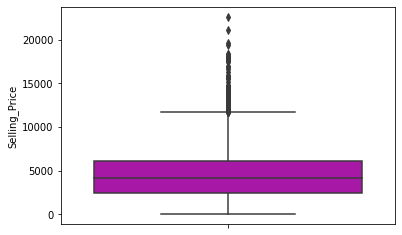

In [25]:
sns.boxplot( y="Selling_Price",color='m', data=train)

In [19]:
train.Selling_Price.describe()

count     6327.000000
mean      4580.406478
std       2952.640478
min          4.000000
25%       2461.805312
50%       4215.972992
75%       6167.643252
max      22638.325941
Name: Selling_Price, dtype: float64

In [20]:
train['Loyalty_customer'].unique()

array([1, 0])

In [21]:
train['Product_Category'].unique()

array([3, 0, 2, 8, 9, 1, 5, 6, 7, 4])

In [22]:
train.Discount_avail.unique()

array([ 0.,  1., nan])

In [23]:
# Replacing nan values of other columns using mean , median mode
train['Discount_avail'] = train['Discount_avail'].fillna(train['Discount_avail'].mean())
train['charges_1'] = train['charges_1'].fillna(train['charges_1'].mean())
train['charges_2 (%)'] = train['charges_2 (%)'].fillna(train['charges_2 (%)'].mean())
train['Minimum_price'] = train['Minimum_price'].fillna(train['Minimum_price'].mean())
train['Maximum_price'] = train['Maximum_price'].fillna(train['Maximum_price'].mean())
train['Stall_no'] = train['Stall_no'].fillna(train['Stall_no'].median())


In [24]:
# Rechecking the presence of null values
train.isnull().sum()


Product_id          0
Stall_no            0
instock_date        0
Market_Category     0
Customer_name       0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
year                0
month               0
quarter             0
day of the week     0
Dayofyear           0
hour                0
dtype: int64

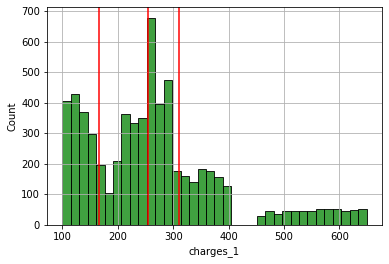

In [26]:
# Hist plot of Charges_1
sns.histplot(train.charges_1,color='g')
plt.grid('True')
for x in [0.25,0.5,0.75]:
    plt.axvline(train.charges_1.quantile(x),c='r',lw=1.5)
plt.show()

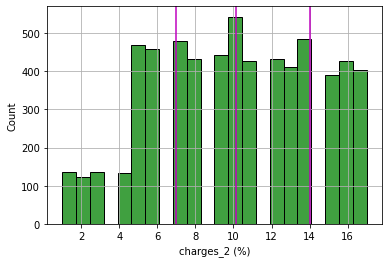

In [27]:
# Hist plot of charges_2 (%)
sns.histplot(train['charges_2 (%)'],color='g')
plt.grid('True')
for x in [0.25,0.50,0.75]:
    plt.axvline(train['charges_2 (%)'].quantile(x),color='m',lw=1.5)
plt.show()

In [28]:
train.Minimum_price.describe()


count     6327.000000
mean      3533.844490
std       2187.101922
min          1.000000
25%       1890.000000
50%       3179.000000
75%       4691.000000
max      17580.000000
Name: Minimum_price, dtype: float64

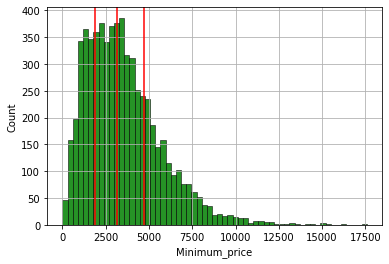

In [29]:
# Hist plot of Minimum Price
sns.histplot(train.Minimum_price,color='g',alpha=0.85)
plt.grid('True')
for x in [0.25,0.50,0.75]:
    plt.axvline(train.Minimum_price.quantile(x),c='r',lw=1.5)
plt.show()

### Feature Engineering

In [30]:
# Create charges_1 (%) by dividing each column value in charges_1 by 100
train['charges_1 (%)'] = train['charges_1'] /100
# Create charges_2 by multiplying each column value in charges_2 (%) by 100
train['charges_2'] = train['charges_2 (%)'] *100
# Adding charges_1 and charges_2 to get total charges
train["total_charges"]= train['charges_1']+train['charges_2']
# Maximum - minium price = range
train["range"] = train['Maximum_price']-train['Minimum_price']

In [31]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,year,month,quarter,day of the week,Dayofyear,hour,charges_1 (%),charges_2,total_charges,range
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,3706,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8,3,5,234,18,3.76,1100.0,1476.0,1730.0
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,3427,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3,1,6,87,21,3.97,1200.0,1597.0,2857.0
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,4790,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8,3,1,230,19,2.50,900.0,1150.0,1557.0
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,67,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3,1,0,88,21,1.44,1300.0,1444.0,15724.0
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,1740,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3,1,1,89,22,2.11,400.0,611.0,6831.0


###  Split the dataset into training and testing

In [32]:
train =train.drop(["instock_date","Product_id"],axis =1)


In [33]:
x = train
x = x.drop(["Selling_Price"],axis =1)
y = train['Selling_Price']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4428, 22)
(4428,)
(1899, 22)
(1899,)


### Model Building

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [61]:
gbr = GradientBoostingRegressor(random_state=0)
xgb = xgboost.XGBRegressor(n_jobs=-1)
et = ExtraTreesRegressor(n_jobs=-1)
rf = RandomForestRegressor(n_jobs=-1)
ds = DecisionTreeRegressor()

In [38]:
reg = {
"LinearRegression": LinearRegression(),
"KNeighborsRegressor":KNeighborsRegressor(n_neighbors=2),
"AdaBoostRegressor":AdaBoostRegressor(random_state=0, n_estimators=100),
"LGBMRegressor":LGBMRegressor(),
"Ridge": Ridge(alpha=1.0),
"ElasticNet":ElasticNet(random_state=0),
"GradientBoostingRegressor":GradientBoostingRegressor(random_state=0),
"DecisionTreeRegressor": DecisionTreeRegressor(),
"ExtraTreesRegressor": ExtraTreesRegressor(n_jobs=-1),
"RandomForestRegressor": RandomForestRegressor(n_jobs=-1),
"XGBRegressor":xgboost.XGBRegressor(n_jobs=-1)
}

In [39]:
%%time
dic =  {"Model":[],"R2_Train":[],"RMSE_Train":[]}
for name, model in reg.items():

   
  model.fit(x_train, y_train)
  y_train_pre = model.predict(x_test)
  r2 = r2_score(y_test, y_train_pre)
  rmse  = np.sqrt(mean_squared_error(y_test, y_train_pre))
  print("--------------------------------------------------------------")
  print("Model:", name)
  print("-----Training Data Evalution-----")
  print("R2 Value: ", r2_score(y_test, y_train_pre))
  print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_train_pre)))
  dic["Model"].append(name)
  dic["R2_Train"].append(r2)
  dic["RMSE_Train"].append(rmse)






--------------------------------------------------------------
Model: LinearRegression
-----Training Data Evalution-----
R2 Value:  0.9264617055358184
RMSE:  772.2650684769981
--------------------------------------------------------------
Model: KNeighborsRegressor
-----Training Data Evalution-----
R2 Value:  0.5066549308344905
RMSE:  2000.2533680469712
--------------------------------------------------------------
Model: AdaBoostRegressor
-----Training Data Evalution-----
R2 Value:  0.8660939523460852
RMSE:  1042.1007542509792
--------------------------------------------------------------
Model: LGBMRegressor
-----Training Data Evalution-----
R2 Value:  0.9910302760994496
RMSE:  269.7113059821462
--------------------------------------------------------------
Model: Ridge
-----Training Data Evalution-----
R2 Value:  0.9264950793292154
RMSE:  772.0898105391178
--------------------------------------------------------------
Model: ElasticNet
-----Training Data Evalution-----
R2 Value:  0.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2494028126.3352985, tolerance: 3973437.5057197907
  positive)


--------------------------------------------------------------
Model: GradientBoostingRegressor
-----Training Data Evalution-----
R2 Value:  0.9878056689956347
RMSE:  314.47679454887094
--------------------------------------------------------------
Model: DecisionTreeRegressor
-----Training Data Evalution-----
R2 Value:  0.9741032221532704
RMSE:  458.2816626155331
--------------------------------------------------------------
Model: ExtraTreesRegressor
-----Training Data Evalution-----
R2 Value:  0.9930286312339558
RMSE:  237.776342578504
--------------------------------------------------------------
Model: RandomForestRegressor
-----Training Data Evalution-----
R2 Value:  0.9915832040105403
RMSE:  261.2660712735614
[05:29:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--------------------------------------------------------------
Model: XGBRegressor
-----Training Data Evalution-----
R2 Value:  0.9884646082765025


In [40]:
final_data = pd.DataFrame(dic)
final_data

,Model,R2_Train,RMSE_Train
0,LinearRegression,0.926462,772.265068
1,KNeighborsRegressor,0.506655,2000.253368
2,AdaBoostRegressor,0.866094,1042.100754
3,LGBMRegressor,0.991030,269.711306
4,Ridge,0.926495,772.089811
5,ElasticNet,0.750012,1423.865375
6,GradientBoostingRegressor,0.987806,314.476795
7,DecisionTreeRegressor,0.974103,458.281663
8,ExtraTreesRegressor,0.993029,237.776343
9,RandomForestRegressor,0.991583,261.266071


In [41]:
final_data.sort_values("RMSE_Train", axis = 0, ascending = True)

,Model,R2_Train,RMSE_Train
8,ExtraTreesRegressor,0.993029,237.776343
9,RandomForestRegressor,0.991583,261.266071
3,LGBMRegressor,0.991030,269.711306
10,XGBRegressor,0.988465,305.862186
6,GradientBoostingRegressor,0.987806,314.476795
7,DecisionTreeRegressor,0.974103,458.281663
4,Ridge,0.926495,772.089811
0,LinearRegression,0.926462,772.265068
2,AdaBoostRegressor,0.866094,1042.100754
5,ElasticNet,0.750012,1423.865375


From the above we find that the best preictions are given by ExtraTreesRegressor and RandomForestRegressor.

#### Randomforest regression

In [44]:
from sklearn.ensemble import RandomForestRegressor 
# create regressor object 
rf = RandomForestRegressor(n_jobs=-1)
# fit the regressor with x and y data 
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
pred_rf = rf.predict(x_test)
pred_rf = pd.DataFrame(pred_rf)

In [46]:
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test, pred_rf)**0.5)

267.30409437384196


Feature: 0, Score: 0.00039
Feature: 1, Score: 0.00040
Feature: 2, Score: 0.00092
Feature: 3, Score: 0.00009
Feature: 4, Score: 0.00033
Feature: 5, Score: 0.00196
Feature: 6, Score: 0.00061
Feature: 7, Score: 0.29459
Feature: 8, Score: 0.00101
Feature: 9, Score: 0.00021
Feature: 10, Score: 0.13123
Feature: 11, Score: 0.55819
Feature: 12, Score: 0.00014
Feature: 13, Score: 0.00014
Feature: 14, Score: 0.00008
Feature: 15, Score: 0.00021
Feature: 16, Score: 0.00066
Feature: 17, Score: 0.00029
Feature: 18, Score: 0.00105
Feature: 19, Score: 0.00022
Feature: 20, Score: 0.00044
Feature: 21, Score: 0.00684


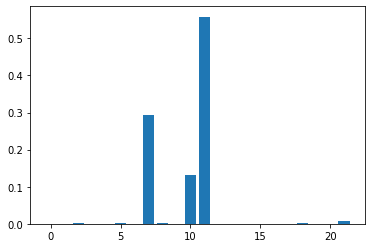

In [50]:
# Seeing the feature importance 
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

###### Feature selection

In [52]:
# Recursive Feature Elimination to select important features
from sklearn.feature_selection import RFE
sel2 = RFE(RandomForestRegressor(), n_features_to_select =5)
sel2.fit(x_train,y_train)

RFE(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                    criterion='mse', max_depth=None,
                                    max_features='auto', max_leaf_nodes=None,
                                    max_samples=None, min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=100, n_jobs=None,
                                    oob_score=False, random_state=None,
                                    verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [53]:
sel2.get_support()

array([False, False, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True])

In [54]:
features2 = x_train.columns[sel2.get_support()]
features2

Index(['Discount_avail', 'charges_1', 'Minimum_price', 'Maximum_price',
       'range'],
      dtype='object')

In [55]:
x_train_rfe = sel2.transform(x_train)
x_test_rfe = sel2.transform(x_test)
clf = RandomForestRegressor()
clf.fit(x_train_rfe,y_train)
y_pred_rfe =clf.predict(x_test_rfe)
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test, y_pred_rfe)**0.5)

306.5506329241196


When I used RandomForestRegressor along with recursive feature elimination to predict the given test data, my public score on the leaderboard was 89.83489.   

#### ExtraTreesRegressor


In [57]:
et = ExtraTreesRegressor(n_jobs=-1)
et.fit(x_train,y_train)
y_pred_et =et.predict(x_test)
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test, y_pred_et)**0.5)

247.33224457780432


Feature: 0, Score: 0.00056
Feature: 1, Score: 0.00089
Feature: 2, Score: 0.00079
Feature: 3, Score: 0.00043
Feature: 4, Score: 0.00054
Feature: 5, Score: 0.00436
Feature: 6, Score: 0.00055
Feature: 7, Score: 0.27953
Feature: 8, Score: 0.00105
Feature: 9, Score: 0.00042
Feature: 10, Score: 0.31126
Feature: 11, Score: 0.35435
Feature: 12, Score: 0.00137
Feature: 13, Score: 0.00050
Feature: 14, Score: 0.00049
Feature: 15, Score: 0.00056
Feature: 16, Score: 0.00083
Feature: 17, Score: 0.00046
Feature: 18, Score: 0.00102
Feature: 19, Score: 0.00036
Feature: 20, Score: 0.00044
Feature: 21, Score: 0.03924


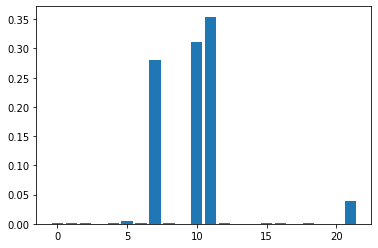

In [60]:
importance = et.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [58]:
# Recursive Feature Elimination to select important features 
sel3 = RFE(ExtraTreesRegressor(n_jobs=-1),n_features_to_select =5)
sel3.fit(x_train,y_train)
sel3.get_support()
features3 = x.columns[sel3.get_support()]
features3


Index(['Grade', 'Discount_avail', 'Minimum_price', 'Maximum_price', 'range'], dtype='object')

When I used ExtraTreesRegressor along with recursive feature elimination to predict the given test data, my public score on the leaderboard was 89.82776.

#### VotingRegressor

In [59]:
# I used VotingRegressor with base regressors as ExtraTreesRegressor and RandomForestRegressor as they both gave the best predictions as described in previous cells

%%time
from sklearn.ensemble import VotingRegressor
model = VotingRegressor([('et', et),('rf',rf)],n_jobs=-1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2_test = r2_score(y_test, y_pred)
rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 Value: ", r2_test)
print("RMSE: ",rmse_test)

R2 Value:  0.9925339752096655
RMSE:  246.06754038813017
CPU times: user 309 ms, sys: 200 ms, total: 509 ms
Wall time: 7.4 s


Finally, I used the VotingRegressor as my final model and trained it on the entire given training data. 

In [62]:
%%time

model = VotingRegressor([('et', et),('rf',rf)],n_jobs=-1)

model.fit(x,y)

y_pred = model.predict(x)
r2_test = r2_score(y, y_pred)
rmse_test  = np.sqrt(mean_squared_error(y, y_pred))
print("R2 Value: ", r2_test)
print("RMSE: ",rmse_test)

R2 Value:  0.9995990972826119
RMSE:  59.11473482914835
CPU times: user 622 ms, sys: 257 ms, total: 879 ms
Wall time: 10 s


### Test data

In [63]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year,month,quarter,day of the week,Dayofyear,hour
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340,2016,1,1,2,13,7
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955,2015,8,3,6,235,20
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715,2015,11,4,5,318,18
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078,2015,11,4,5,325,4
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244,2015,5,2,2,126,15


In [64]:
# Finding number of null values in each column
test.isnull().sum()


Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
year                 0
month                0
quarter              0
day of the week      0
Dayofyear            0
hour                 0
dtype: int64

In [65]:
test['Customer_name'] = test['Customer_name'].fillna(test['Customer_name'].mode()[0])


In [66]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year,month,quarter,day of the week,Dayofyear,hour
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340,2016,1,1,2,13,7
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955,2015,8,3,6,235,20
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715,2015,11,4,5,318,18
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078,2015,11,4,5,325,4
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244,2015,5,2,2,126,15


In [67]:
# Applying Label Encoding to categorical columns
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Customer_name'. 
test['Customer_name']= label_encoder.fit_transform(test['Customer_name']) 

# Encode labels in column 'Loyalty_customer'. 
test['Loyalty_customer']= label_encoder.fit_transform(test['Loyalty_customer']) 

# Encode labels in column 'Product_Category'. 
test['Product_Category']= label_encoder.fit_transform(test['Product_Category']) 


In [68]:
test['charges_1'] = test['charges_1'].fillna(test['charges_1'].mean())
test['charges_2 (%)'] = test['charges_2 (%)'].fillna(test['charges_2 (%)'].mean())
test['Minimum_price'] = test['Minimum_price'].fillna(test['Minimum_price'].mean())
test['Stall_no'] = test['Stall_no'].fillna(test['Stall_no'].median())


In [69]:
test['charges_1 (%)'] = test['charges_1'] /100
test['charges_2'] = test['charges_2 (%)'] *100
test["total_charges"]= test['charges_1']+train['charges_2']

In [70]:
test["range"] = test['Maximum_price']-test['Minimum_price']

In [71]:
test["total_charges"] = test["total_charges"].fillna(test["total_charges"].mean())


In [72]:
p_id = test["Product_id"]
test = test.drop(["Product_id","instock_date"],axis =1)

In [75]:
prediction = model.predict(test)

In [76]:
prediction = pd.DataFrame(prediction)
prediction

,0
0,3247.055746
1,1960.831272
2,11729.318566
3,9362.503159
4,5641.617289
...,...
3425,3988.357157
3426,9370.407336
3427,6362.561007
3428,3472.185448


In [77]:
Prediction = pd.concat([p_id,prediction],axis =1)

In [78]:
Prediction

,Product_id,0
0,SCHE4YSTDVPVZVXW,3247.055746
1,ACCEGCATKHNRXUHW,1960.831272
2,NKCE6GJ5XVJDXNNZ,11729.318566
3,NKCEB8BK3ZXDHDHM,9362.503159
4,TOPEFDXSAHRNPF94,5641.617289
...,...,...
3425,BBAE9K7BXFUTDNBK,3988.357157
3426,RTRDYPA4PJHCJCGF,9370.407336
3427,TUNE8FWQBS7TVVT7,6362.561007
3428,NKCEGMUABCRGUZPE,3472.185448


The final model led to a public score of 90.03197 and leaderboard rank 75.